## **How GD with Momentum considers all the past gradients to build momentum**

let's break down how the "history" of velocity is considered in Gradient Descent with Momentum, using the formulas

**Formulas**

Here are the formulas we'll be working with:

* Velocity update:  
    * $v_t = \beta v_{t-1} + (1 - \beta) g_t$
* Weight update:
    * $w_{t+1} = w_t - \eta v_t$

Where:

* $v_t$: Velocity at time step t
* $v_{t-1}$: Velocity at the previous time step
* $\beta$: Momentum coefficient (between 0 and 1)
* $g_t$: Gradient of the loss function at time step t
* $w_t$: Weight at time step t
* $\eta$: Learning rate

**Explanation**

The key to understanding momentum is the velocity update formula. The current velocity, $v_t$, is a combination of:

* The previous velocity, $v_{t-1}$, scaled by $\beta$.
* The current gradient, $g_t$, scaled by $(1 - \beta)$.

This means the velocity at any given time is influenced by all past gradients, but with exponentially decreasing weights.  The $\beta$ parameter controls how much of the "history" is retained. A higher $\beta$ gives more weight to past velocities (and thus, past gradients), while a lower $\beta$ gives more weight to the current gradient.

**Example: 4 Epochs**

Let's walk through a hypothetical example with 4 epochs to see how the velocity and weights are updated. We'll use the following example values:

* Initial weight, $w_0$: 10
* Initial velocity, $v_0$: 0
* Learning rate, $\eta$: 0.2
* Momentum coefficient, $\beta$: 0.9
* Gradients:
    * $g_1$: -2
    * $g_2$: -1
    * $g_3$: 0.5
    * $g_4$: 1

**Calculations**

* **Epoch 1:**
    * $v_1 = \beta v_0 + (1 - \beta) g_1 = 0.9 * 0 + (1 - 0.9) * (-2) = -0.2$
    * $w_2 = w_1 - \eta v_1 = 10 - 0.2 * (-0.2) = 10.04$
* **Epoch 2:**
    * $v_2 = \beta v_1 + (1 - \beta) g_2 = 0.9 * (-0.2) + (1 - 0.9) * (-1) = -0.18 - 0.1 = -0.28$
    * $w_3 = w_2 - \eta v_2 = 10.04 - 0.2 * (-0.28) = 10.096$
* **Epoch 3:**
    * $v_3 = \beta v_2 + (1 - \beta) g_3 = 0.9 * (-0.28) + (1 - 0.9) * (0.5) = -0.252 + 0.05 = -0.202$
    * $w_4 = w_3 - \eta v_3 = 10.096 - 0.2 * (-0.202) = 10.1364$
* **Epoch 4:**
    * $v_4 = \beta v_3 + (1 - \beta) g_4 = 0.9 * (-0.202) + (1 - 0.9) * (1) = -0.1818 + 0.1 = -0.0818$
    * $w_5 = w_4 - \eta v_4 = 10.1364 - 0.2 * (-0.0818) = 10.15276$

**How History is Considered**

* **Epoch 1:** $v_1$ is directly proportional to $g_1$.
* **Epoch 2:** $v_2$ is influenced by both $v_1$ (which itself depends on $g_1$) and $g_2$.
* **Epoch 3:** $v_3$ depends on $v_2$ (which depends on $g_1$ and $g_2$) and $g_3$.
* **Epoch 4:** $v_4$ depends on $v_3$ (which depends on $g_1$, $g_2$, and $g_3$) and $g_4$.

As you can see, the velocity at each step is a weighted combination of the current gradient and all previous gradients, with the weights decreasing exponentially into the past. This is how momentum incorporates the "history" of the gradients to influence the weight updates.

## **Demo to show how velocity increases per Epoch (IGNORE THE CODE AS ITS JUST FOR DEMO)**

Weights: [15, 14.19, 12.831, 11.1579, 9.38211, 7.693899000000001, 6.219509100000002]
Velocities: [0, 0.8999999999999998, 1.5099999999999998, 1.8589999999999995, 1.9730999999999996, 1.8757899999999998, 1.6382109999999999]


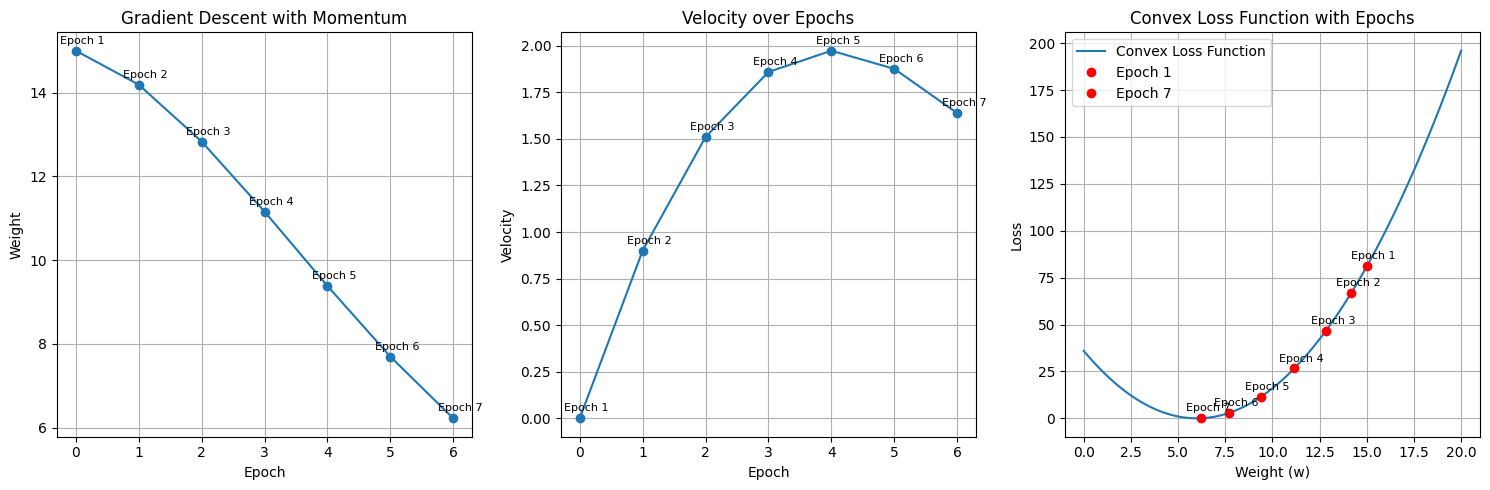

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Initialize parameters
w1 = 15  # Initial weight
v0 = 0    # Initial velocity
beta = 0.9  # Momentum coefficient
alpha = 0.9  # Learning rate - reduced to 0.1
epochs = 6  # Number of epochs

# Hypothetical gradients (for a convex function with a minimum around w=6)
gradients = [9, 7, 5, 3, 1, -0.5]  # Changed Gradients to start from +9 and approach 0

# Store weights and velocities for plotting
weights = [w1]
velocities = [v0]

# Perform Gradient Descent with Momentum
def gd_with_momentum(w_initial, v_initial, beta, alpha, gradients, epochs):
    """
    Performs gradient descent with momentum for a specified number of epochs.

    Args:
        w_initial: Initial weight.
        v_initial: Initial velocity.
        beta: Momentum coefficient.
        alpha: Learning rate.
        gradients: List of gradients for each epoch.
        epochs: Number of epochs.

    Returns:
        weights: List of weights at each epoch.
        velocities: List of velocities at each epoch.
    """
    w = w_initial
    v = v_initial
    weights = [w]
    velocities = [v]

    for t in range(epochs):
        # Velocity update
        v = beta * v + (1 - beta) * gradients[t]
        velocities.append(v)
        # Weight update
        w = w - alpha * v
        weights.append(w)
    return weights, velocities

weights, velocities = gd_with_momentum(w1, v0, beta, alpha, gradients, epochs)

# Print the results
print("Weights:", weights)
print("Velocities:", velocities)

# Create a single figure with three subplots
plt.figure(figsize=(15, 5))

# Plot the weights over epochs
plt.subplot(1, 3, 1)  # 1 row, 3 columns, first subplot
plt.plot(range(epochs + 1), weights, marker='o')
plt.title('Gradient Descent with Momentum')
plt.xlabel('Epoch')
plt.ylabel('Weight')
plt.grid(True)
for i, w in enumerate(weights):
    plt.annotate(f'Epoch {i+1}', (i, w), textcoords="offset points", xytext=(5,5), ha='center', fontsize=8)

# Plot the velocities over epochs
plt.subplot(1, 3, 2)  # 1 row, 3 columns, second subplot
plt.plot(range(epochs + 1), velocities, marker='o')
plt.title('Velocity over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Velocity')
plt.grid(True)
for i, v in enumerate(velocities):
    plt.annotate(f'Epoch {i+1}', (i, v), textcoords="offset points", xytext=(5,5), ha='center', fontsize=8)

# Plot the Convex Loss Function with Epochs
plt.subplot(1, 3, 3)  # 1 row, 3 columns, third subplot
w_range = np.linspace(0, 20, 100)
loss = (w_range - 6) ** 2
plt.plot(w_range, loss, label='Convex Loss Function')
plt.xlabel('Weight (w)')
plt.ylabel('Loss')
for i, w in enumerate(weights):
    loss_value = (w - 6) ** 2
    plt.plot(w, loss_value, 'ro', label=f'Epoch {i+1}' if i == 0 or i == epochs else '')
    plt.annotate(f'Epoch {i+1}', (w, loss_value), textcoords="offset points", xytext=(5,5), ha='center', fontsize=8)
plt.title('Convex Loss Function with Epochs')
plt.legend()
plt.grid(True)

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()
